<a href="https://colab.research.google.com/github/Elman295/ViT_MNIST_full_code/blob/main/vit_mnist_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torch import nn

In [2]:
tfms = transforms.Compose([
    transforms.ToTensor()
])

train_ds = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = tfms
)

test_ds = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = tfms
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 53933422.38it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1701487.40it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14002784.80it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8172685.01it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_dl = DataLoader(dataset = train_ds, batch_size = 32, shuffle = True)

test_dl = DataLoader(dataset = test_ds, batch_size = 32, shuffle = False)

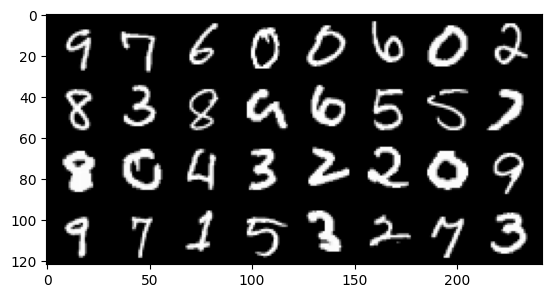

In [4]:
image, label = next(iter(train_dl))
outs = torchvision.utils.make_grid(image)

plt.imshow(np.transpose(outs,(1,2,0)))
plt.show()

In [5]:
MNIST_examples = torch.stack([train_ds[idx][0] for idx in range(5)], dim=0)

In [14]:
rs = torch.tensor([[1,1,1,1,1,1],[2,2,2,2,2,2],[3,3,3,3,3,3],[4,4,4,4,4,4],[5,5,5,5,5,5],[6,6,6,6,6,6]])
rs.shape

torch.Size([6, 6])

In [15]:
rs

tensor([[1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6]])

In [22]:
rs = rs.view(6//3,3,6//3,3)
rs.shape
rs = rs.permute(0,2,1,3)

In [23]:
rs

tensor([[[[1, 1, 1],
          [2, 2, 2],
          [3, 3, 3]],

         [[1, 1, 1],
          [2, 2, 2],
          [3, 3, 3]]],


        [[[4, 4, 4],
          [5, 5, 5],
          [6, 6, 6]],

         [[4, 4, 4],
          [5, 5, 5],
          [6, 6, 6]]]])

In [29]:
def img_to_path(image, p_size = 7):

  c,h,w =  image.shape

  image = image.view(c, h // p_size, p_size, w // p_size, p_size)
  image = image.permute(1,3,0,2,4)
  image = image.flatten(0,1)



  return image

In [30]:
x = torch.rand(size = (1,28,28))
y = img_to_path(x)


In [31]:
y.shape

torch.Size([16, 1, 7, 7])

In [33]:
x_s,y_s = train_ds[0]

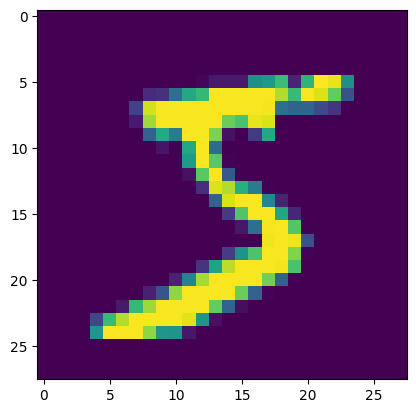

In [34]:
plt.imshow(x_s.permute(1,2,0))

In [35]:
y_p = img_to_path(x_s)

In [36]:
y_p.shape

torch.Size([16, 1, 7, 7])

In [37]:
x_s

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [38]:
y_p

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0706],
          [0.0000, 0.1176, 0.1412, 0.3686, 0.6039, 0.6667, 0.9922]]],


        [[[0.0000, 0.0000, 0.0000, 0.000

In [39]:
y_p.shape

torch.Size([16, 1, 7, 7])

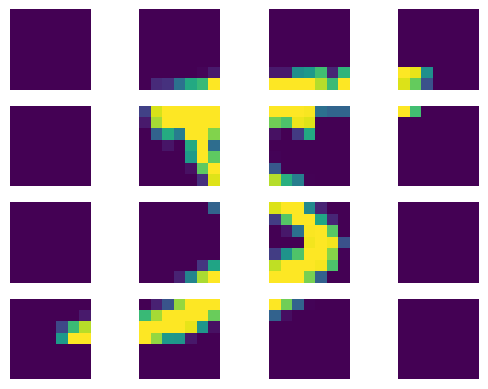

In [41]:
for i in range(y_p.shape[0]):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(np.transpose(y_p[i].detach().numpy(),(1,2,0)))

plt.show()



In [44]:
class ViT_Dataset(Dataset):

  def __init__(self, data):
    self.data = data

  def __len__(self):
    return len(self.data)


  def img_to_path(self, image, p_size = 7):

    c,h,w =  image.shape

    image = image.view(c, h // p_size, p_size, w // p_size, p_size)
    image = image.permute(1,3,0,2,4)
    image = image.flatten(0,1)



    return image

  def __getitem__(self, idx):

    image, label = self.data[idx]

    image = self.img_to_path(image)
    image = image.view((16,7,7))
    return image, label

In [45]:
train_vit_ds = ViT_Dataset(train_ds)

test_vit_ds = ViT_Dataset(test_ds)

In [50]:
image, label = train_vit_ds[120]

In [51]:
image.shape

torch.Size([16, 7, 7])

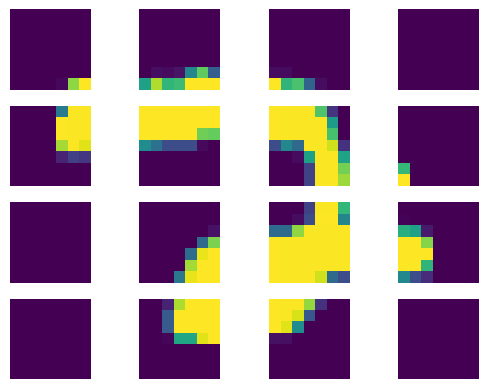

In [52]:
for i in range(image.shape[0]):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(image[i].detach().numpy())

plt.show()



In [53]:
train_dl = DataLoader(dataset = train_vit_ds, batch_size = 32, shuffle = True)

test_dl = DataLoader(dataset = test_vit_ds, batch_size = 32, shuffle = False)

In [56]:
x= torch.rand(size = (32,16,49))
att = nn.MultiheadAttention(49,7)
y = att(x,x,x)

In [63]:
y[0].shape

torch.Size([32, 16, 49])

In [113]:
class ViT(nn.Module):

  def __init__(self, embed, hidden,num_head, num_layers, drop_rate = 0.0):

    super(ViT, self).__init__()


    self.num_layers = num_layers
    self.ln_1 = nn.LayerNorm(embed)
    self.msa = nn.MultiheadAttention(embed,num_head)
    self.ln_2 = nn.LayerNorm(embed)
    self.mlp = nn.Sequential(
        nn.Linear(embed, hidden),
        nn.GELU(),
        nn.Dropout(drop_rate),
        nn.Linear(hidden, embed),
        nn.Dropout(drop_rate)
    )

    self.cls = nn.Linear(49*16, 10)




  def forward(self,x):

    x = x.view((-1,16,49))

    for i in range(self.num_layers):
      x = self.ln_1(x)
      x = x + self.msa(x,x,x)[0]
      x = x + self.mlp(self.ln_2(x))


    # print(x.shape)
    x = x.view((-1,16*49))
    x = self.cls(x)



    return x


In [114]:
vit = ViT(49,3*49,7,6,0.2)

In [115]:
vit

ViT(
  (ln_1): LayerNorm((49,), eps=1e-05, elementwise_affine=True)
  (msa): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=49, out_features=49, bias=True)
  )
  (ln_2): LayerNorm((49,), eps=1e-05, elementwise_affine=True)
  (mlp): Sequential(
    (0): Linear(in_features=49, out_features=147, bias=True)
    (1): GELU(approximate='none')
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=147, out_features=49, bias=True)
    (4): Dropout(p=0.2, inplace=False)
  )
  (cls): Linear(in_features=784, out_features=10, bias=True)
)

In [116]:
x = torch.rand(size = (32,16,7,7))
y = vit(x)

In [117]:
y.shape

torch.Size([32, 10])

In [118]:
opt = torch.optim.Adam(params = vit.parameters(), lr = 1e-3)
loss_fn = nn.CrossEntropyLoss()

In [119]:
def train(data, model, loss_fn, opt):

  model.train()
  size = len(data.dataset)
  for b,(x,y) in enumerate(data):
    # x,y = x.to(device), y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    opt.zero_grad()
    loss.backward()
    opt.step()

    if b % 100 == 0:
      print(f"loss:{loss.item()} [{b*len(x)} | {size}]")

In [120]:
def test(data, model, loss_fn):

  model.eval()
  test_loss, test_acc = 0,0
  size = len(data.dataset)
  num_batch = len(data)

  with torch.no_grad():
    for x,y in data:
      # x,y = x.to(device), y.to(device)
      y_pred = model(x)
      test_loss += loss_fn(y_pred, y).item()
      test_acc += (y_pred.argmax(1)==y).type(torch.float).sum().item()


    test_loss /= num_batch
    test_acc /= size

    print(f"test loss : {test_loss} test_acc:{test_acc * 100}")


In [121]:

for e in range(10):
  print(f"e:{e+1}=-=-=-=")
  train(train_dl, vit, loss_fn, opt)
  test(test_dl, vit, loss_fn)

e:1=-=-=-=
loss:2.6993730068206787 [0 | 60000]
loss:0.4714277386665344 [3200 | 60000]
loss:0.36922183632850647 [6400 | 60000]
loss:0.43334370851516724 [9600 | 60000]
loss:0.4921994209289551 [12800 | 60000]
loss:0.10027194768190384 [16000 | 60000]
loss:0.30902358889579773 [19200 | 60000]
loss:0.4378472566604614 [22400 | 60000]
loss:0.30601081252098083 [25600 | 60000]
loss:0.1379460096359253 [28800 | 60000]
loss:0.5392231345176697 [32000 | 60000]
loss:0.12595006823539734 [35200 | 60000]
loss:0.1251426339149475 [38400 | 60000]
loss:0.2503666877746582 [41600 | 60000]
loss:0.1024709939956665 [44800 | 60000]
loss:0.22503645718097687 [48000 | 60000]
loss:0.029904380440711975 [51200 | 60000]
loss:0.2500428259372711 [54400 | 60000]
loss:0.04837258160114288 [57600 | 60000]
test loss : 0.12449742421640243 test_acc:96.00999999999999
e:2=-=-=-=
loss:0.0852803960442543 [0 | 60000]
loss:0.11040566861629486 [3200 | 60000]
loss:0.04299405589699745 [6400 | 60000]
loss:0.037378549575805664 [9600 | 60000]